In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [9]:
print("Train length :", len(X_train))
print("Test length :", len(X_test))

Train length : 60000
Test length : 10000


In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

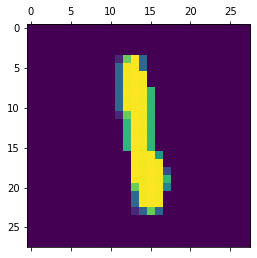

In [15]:
plt.matshow(X_train[200])

In [16]:
y_train[200]

1

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
X_test_flattened.shape

(10000, 784)

In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.4723 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 916us/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 957us/step - loss: 0.2727 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.2667 - accuracy: 0.9251


In [28]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 0s 779us/step - loss: 0.2684 - accuracy: 0.9248


[0.26836490631103516, 0.9247999787330627]

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 716us/step


array([3.4592319e-01, 5.4200194e-03, 9.9954927e-01, 4.2066789e-01,
       6.1748751e-10, 7.5270778e-01, 8.9461011e-01, 1.5283172e-12,
       9.7900666e-02, 4.7413113e-09], dtype=float32)

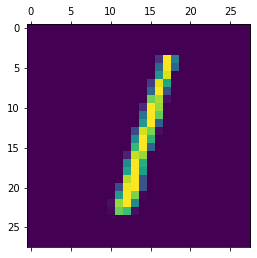

In [39]:
plt.matshow(X_test[2])

In [40]:
np.argmax(y_predicted[2])

1

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    4,   10,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  927,   19,    7,    3,   13,   10,   32,    6],
       [   2,    0,   17,  937,    0,   16,    2,   10,   18,    8],
       [   2,    2,    2,    1,  907,    0,   12,    5,    7,   44],
       [  10,    3,    5,   44,   10,  750,   18,    8,   38,    6],
       [  12,    3,    7,    1,    7,    6,  917,    2,    3,    0],
       [   1,    6,   21,    8,    5,    0,    0,  951,    1,   35],
       [   6,   14,    6,   30,    9,   21,   10,   12,  857,    9],
       [  10,    7,    1,   11,   24,    4,    0,   21,    7,  924]])>

Text(69.0, 0.5, 'Real')

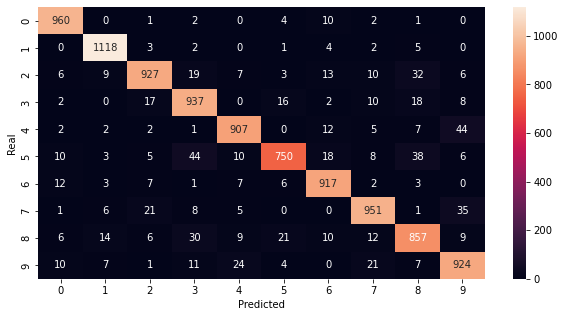

In [54]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2723 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1208 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0849 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0500 - accuracy: 0.9845


In [56]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9780


[0.07111898809671402, 0.9779999852180481]

313/313 [==============================] - 0s 797us/step


Text(69.0, 0.5, 'Real')

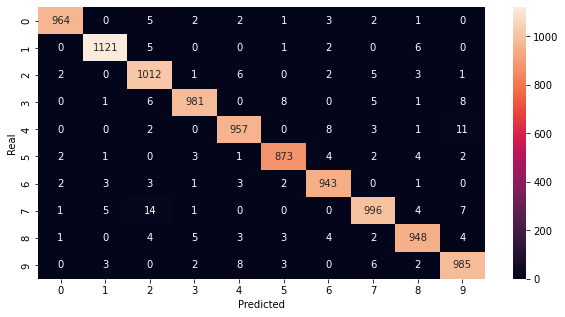

In [62]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

Text(69.0, 0.5, 'Real')

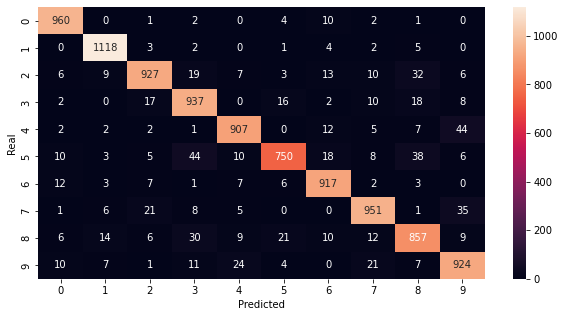

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2498 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0725 - accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0324 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [65]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 972us/step - loss: 0.0877 - accuracy: 0.9777


[0.08769135177135468, 0.9776999950408936]

In [ ]:
w